In [1]:
import tensorflow as tf

In [88]:
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker

/Users/r07525009/miniforge3/envs/tf26/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
!pip install -U ckip-transformers

  Using cached ckip_transformers-0.3.2-py3-none-any.whl (26 kB)
  Using cached torch-1.12.1-cp39-none-macosx_11_0_arm64.whl (49.1 MB)


In [89]:
import torch
print(torch.__version__)
print(torch.backends.mps.is_available())
print(torch.backends.mps.is_built())
device = torch.device("mps")

1.13.0.dev20220930
True
True


In [90]:
ws_driver = CkipWordSegmenter(device=device)
pos_driver = CkipPosTagger(device=device)
ner_driver = CkipNerChunker(device=device)

In [91]:
def ckipped_ws(input):
    input = [input]
    ws = ws_driver(input, use_delim = False)
    return ' '.join(ws[0])

def ckipped_pos(input):
    input = [input]
    ws = ws_driver(input, use_delim = False)
    pos = pos_driver(ws, use_delim = False)

    assert len(ws) == len(pos)
    res = []
    for word_ws, word_pos in zip(ws, pos):
       for wws, wpos in zip(word_ws, word_pos):
         res.append((wws,wpos))
    
    wp = [' '.join(r) for r in res]

    return ' '.join(wp)

def ckipped_ner(input):
    input = [input]
    ner = ner_driver(input, use_delim=False)
    ner_word = [i[0]  for n in ner for i in n]
    ner_type = [i[1]  for n in ner for i in n]
    return ner_word, ner_type
            
    

In [92]:
sent = '今天的社科院圖書館好熱'
ws = ckipped_ws(sent)
pos = ckipped_pos(ws)
ner_w, ner_t = ckipped_ner(sent)
print(pos)
print(ner_w)
print(ner_t)

Inference: 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

今天 Nd   WHITESPACE 的 DE   WHITESPACE 社科院 Nc   WHITESPACE 圖書館 Nc   WHITESPACE 好 Dfa   WHITESPACE 熱 VHC
['今天', '社科院']
['DATE', 'ORG']


In [93]:
input = ['美國參議院針對今天總統布什所提名的勞工部長趙小蘭展開認可聽證會，預料她將會很順利通過參議院支持，成為該國有史以來第一位的華裔女性內閣成員。']
ner = ner_driver(input, use_delim=False)
ner

Inference: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


[[NerToken(word='美國參議院', ner='ORG', idx=(0, 5)),
  NerToken(word='今天', ner='LOC', idx=(7, 9)),
  NerToken(word='布什', ner='PERSON', idx=(11, 13)),
  NerToken(word='勞工部長', ner='ORG', idx=(17, 21)),
  NerToken(word='趙小蘭', ner='PERSON', idx=(21, 24)),
  NerToken(word='認可聽證會', ner='EVENT', idx=(26, 31)),
  NerToken(word='參議院', ner='ORG', idx=(42, 45)),
  NerToken(word='第一', ner='ORDINAL', idx=(56, 58)),
  NerToken(word='華裔', ner='NORP', idx=(60, 62))]]

In [99]:
def ckipped(input):
    input = [input]    
    ws = ws_driver(input, use_delim = False)
    pos = pos_driver(ws, use_delim = False)

    assert len(ws) == len(pos)
    res = []
    for word_ws, word_pos in zip(ws, pos):
       for wws, wpos in zip(word_ws, word_pos):
         res.append((wws,wpos))
    print('ckipped done')
    return res
  
def cwn_tagged(lemma):
    if cwn_tagger is None:
       print('re-initializing ckip...')
       warmup()
    
    tagged = cwn_tagger.find_lemma(lemma)
    senses = tagged[0].senses
    num_of_sense = len(senses)

    return senses, num_of_sense

In [97]:
input= '三角函數很棒'
res = ckipped(input)

Inference: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

ckipped done


In [96]:
from CwnGraph import CwnImage

In [102]:
word = [r[0] for r in res]
pos = [r[1] for r in res]

senses, num_of_sense = [], []
for w in word:
    s, ns = cwn_tagged(w)
    senses.append(s)
    num_of_sense.append(ns)
print(senses)
print(num_of_sense)


[[], [<CwnSense[04040801](很少，VH): 形容數量少。>, <CwnSense[04040802](很少，Neqa): 數量少。>, <CwnSense[04040803](很少，VH): 形容低於預期程度。>, <CwnSense[04040804](很少，D): 表事件發生的頻率比預期低。>], [<CwnSense[05130301](接棒，VB,nom): 接力賽跑中，接受他人傳交的棒子。>, <CwnSense[05130302](接棒，VB,nom): 接力賽跑中，接交棒子的過程。>, <CwnSense[05130303](接棒，VB,nom): 接替責任或所有權。>, <CwnSense[05130304](接棒，VB,nom): 延續承接股盤漲勢。>]]
[0, 4, 4]


In [101]:
cwn_tagger = CwnImage.latest()
lemmas = cwn_tagger.find_lemma("電腦")
senses = lemmas[0].senses
senses

[<CwnSense[06613601](電腦，Na): 一種資料處理裝置，能自動接受並儲存、處理輸入的資料，然後經由一組預先存放在機器內的指令逐步引導下產生輸出結果。>,
 <CwnSense[06613602](電腦，Na): 研究或操作電腦的知識。>,
 <CwnSense[06613603](電腦，Na): 比喻計算或記憶能力很強的人。>]

In [6]:
import pandas as pd
import json
import re
import os
from snownlp import SnowNLP
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def load_json(file_path):               
    
    with open(file_path, 'r', encoding="UTF-8") as file:
        data = json.load(file)
        
    return data

In [8]:
test = load_json('./data/Food/2020/20200112_2215_M.1578838516.A.40F.json')
test

{'post_board': 'Food',
 'post_id': 'M.1578838516.A.40F',
 'post_time': 1578838516,
 'post_title': '[食記] 台北 忠孝SOGO 海記 醬油雞 雞肉軟嫩多汁',
 'post_author': 'jay70134',
 'post_body': '餐廳名稱：海記\n    消費時間：108年10月\n    地址：台北市大安區忠孝東路四段45號 (忠孝SOGO百貨 B1)\n    電話：(02)8771-8403\n    每人平均價位：NT200~300元\n    營業時間：11:00-21:00\n\n圖文好讀版\nhttps://jay7134.pixnet.net/blog/post/228380882\n\n【小艾吃美食】雖說我去過幾次新加坡，每次出發前都很認真搜尋在地美食，但這間海記\n醬油雞倒是來台灣後我才知曉它的存在，好奇搜尋一下它的歷史，店家在1959年創立，至\n今剛好60年，在海內外皆有店面，台灣部分先在台中駐點，近期才到台北。前去用餐過的\n朋友都說味道不錯，雞肉軟嫩，適合沒牙齒的我XD，這天剛好去東區購物，就順道來品嘗\n看看囉。\n\n店面位在忠孝SOGO百貨地下一樓的美食街，走進美食街就可以看到玻璃櫥窗內掛滿賞心悅\n目的雞兒們，焦糖色的外表看得我口水直流。平日時段生意強強滾，需要小排隊一下。\n\n我看到菜單寫限定販售的雙雞叉燒(250元)立刻毫不猶豫的點單。內容有醬油雞、海南白\n雞、叉燒與脆皮燒肉，多種口味一次滿足!!\n\n每樣肉品都很好吃，真的是嫩且不乾柴，醬油並非想像中的死鹹，它是屬於甜鹹風味，開\n胃又下飯。\n\n配菜有滷豆腐、滷蛋、青菜與炸餛飩，很豐盛。\n\n自製的沾醬，最左邊是老抽醬油，中間是辣醬，右邊是油蔥。食物本身味道已經很足夠了\n，所以除了油蔥，其它我都沒用到。\n\n套餐提供的香醇雞湯，屬於清爽路線，正好中和醬油的味道。\n\n朋友單點的小份燒肉(220元)，表皮酥脆，肥瘦肉均衡，肥肉部分不油膩，好吃。\n\n雙雞飯(180元)，跟我的相比，氣勢變好弱XXD。\n\n我很喜歡新加坡的薏米水，所以看到店家有賣，非常開心，這杯30元，真材實料很濃厚，\n可能生意太好來不及冰，我想喝冰的啊。\n\n完整菜單\n

In [9]:
def extract_title(json_data):
    title = [json_data['post_title']]
    return title

def extract_content(json_data):
        
    # 把'post_body'跟'content'文字內容取出
    content = []
    
    content.append(json_data['post_body'])
    for i in range(len(json_data['comments'])):
        content.append(json_data['comments'][i]['content'])
            
    # 清理圖片並以\n斷開句子
    for i in range(len(content)):
        content[i] = re.sub('http(s)?://.+.jpg', '', content[i])
        content[i] = re.sub('\n\n', '\n', content[i])
        content[i] = re.sub('--', '', content[i])
        content[i] = content[i].split('\n')
    
    contents = [con for cont in content for con in cont]

    # Clean urls
    for con in contents:
        if re.search('^https?:\/\/.*[\r\n]*', con):
            contents.remove(con)
        if len(con) == 0:
            contents.remove(con)
    
    return contents    

In [10]:
ex = extract_content(test)
ex

['餐廳名稱：海記',
 '    消費時間：108年10月',
 '    地址：台北市大安區忠孝東路四段45號 (忠孝SOGO百貨 B1)',
 '    電話：(02)8771-8403',
 '    每人平均價位：NT200~300元',
 '    營業時間：11:00-21:00',
 '圖文好讀版',
 '【小艾吃美食】雖說我去過幾次新加坡，每次出發前都很認真搜尋在地美食，但這間海記',
 '醬油雞倒是來台灣後我才知曉它的存在，好奇搜尋一下它的歷史，店家在1959年創立，至',
 '今剛好60年，在海內外皆有店面，台灣部分先在台中駐點，近期才到台北。前去用餐過的',
 '朋友都說味道不錯，雞肉軟嫩，適合沒牙齒的我XD，這天剛好去東區購物，就順道來品嘗',
 '看看囉。',
 '店面位在忠孝SOGO百貨地下一樓的美食街，走進美食街就可以看到玻璃櫥窗內掛滿賞心悅',
 '目的雞兒們，焦糖色的外表看得我口水直流。平日時段生意強強滾，需要小排隊一下。',
 '我看到菜單寫限定販售的雙雞叉燒(250元)立刻毫不猶豫的點單。內容有醬油雞、海南白',
 '雞、叉燒與脆皮燒肉，多種口味一次滿足!!',
 '每樣肉品都很好吃，真的是嫩且不乾柴，醬油並非想像中的死鹹，它是屬於甜鹹風味，開',
 '胃又下飯。',
 '配菜有滷豆腐、滷蛋、青菜與炸餛飩，很豐盛。',
 '自製的沾醬，最左邊是老抽醬油，中間是辣醬，右邊是油蔥。食物本身味道已經很足夠了',
 '，所以除了油蔥，其它我都沒用到。',
 '套餐提供的香醇雞湯，屬於清爽路線，正好中和醬油的味道。',
 '朋友單點的小份燒肉(220元)，表皮酥脆，肥瘦肉均衡，肥肉部分不油膩，好吃。',
 '雙雞飯(180元)，跟我的相比，氣勢變好弱XXD。',
 '我很喜歡新加坡的薏米水，所以看到店家有賣，非常開心，這杯30元，真材實料很濃厚，',
 '可能生意太好來不及冰，我想喝冰的啊。',
 '完整菜單',
 '我跟朋友都很喜歡海記的味道，價格來說當然不算便宜，但人生苦短嘛，偶而放縱一次吃',
 '個美食不為過，你們說是吧XD。',
 '自助旅行、飛行、美食 努力累積世界足跡']

In [21]:
def snow_analyze(rawText):
    
    scores = []
    for text in rawText:
        res = SnowNLP(text)
        scores.append(res.sentiments)

    df = pd.DataFrame({
        'sentence':rawText,
        'score':scores
        })
    
    return df

def make_plot(df):

    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    #plt.rcParams['font.sans-serif']=['Taipei Sans TC Beta']
    #plt.rcParams['axes.unicode_minus'] = False

    fig = plt.figure(figsize=(20, 5))
    plt.title('Sentiment Scores Plot')
    plt.xticks(rotation = 90, fontsize = 10)
    sns.barplot( x = 'sentence', y = 'score', data = df, palette = "pastel")



In [12]:
snow_df = snow_analyze(ex)
snow_df.head()

,sentence,score
0,餐廳名稱：海記,0.949051
1,消費時間：108年10月,0.002974
2,地址：台北市大安區忠孝東路四段45號 (忠孝SOGO百貨 B1),0.999841
3,電話：(02)8771-8403,0.139495
4,每人平均價位：NT200~300元,0.248749


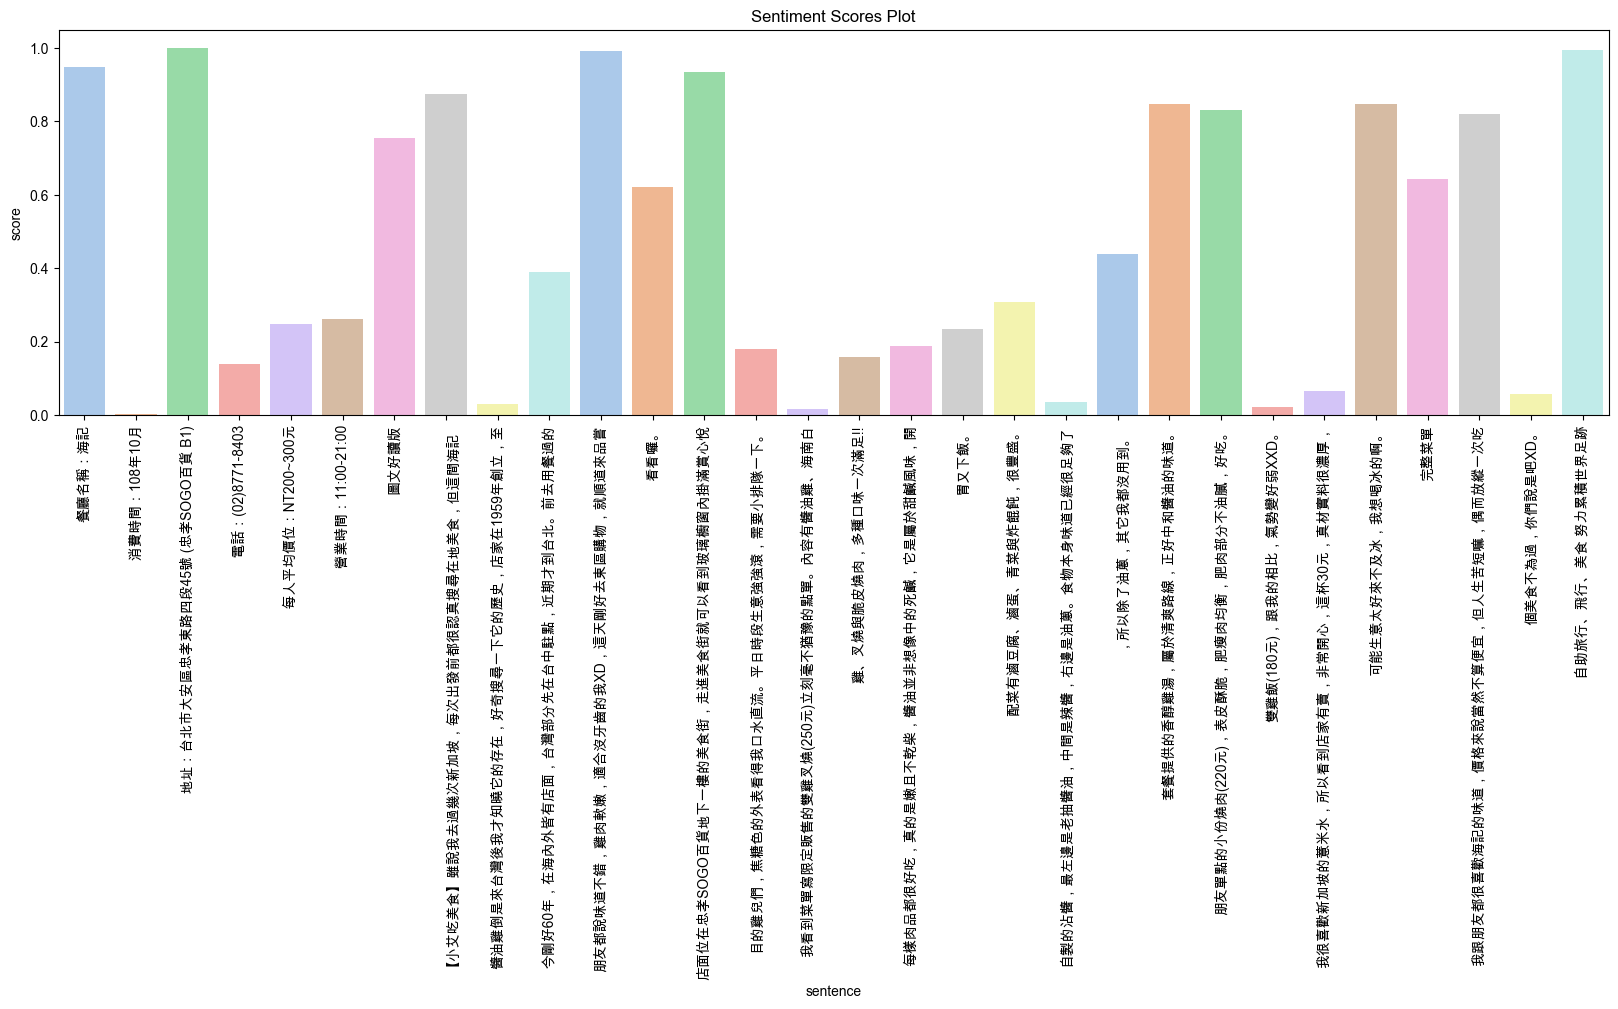

In [13]:
make_plot(snow_df)

In [144]:
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

In [151]:
import matplotlib
matplotlib.matplotlib_fname()

'/Users/r07525009/miniforge3/envs/tf26/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'

In [78]:
jsons = os.listdir("./data/Horror/2020")

conts = []
for j in jsons:
    filenames = (f"./data/Horror/2020/{j}")
    files = load_json(filenames)
    cont = extract_content(files)
    conts.append(cont) 

In [86]:
for cont in conts:
    for idx, con in enumerate(cont):
        if re.search('心得', con):
            text = cont[idx-1:idx+2]
            print(''.join(text))


劇情介紹:看女主角就夠了心得：我標題打爛片  真的不是開玩笑的
推薦：.......其他：我剛跑去電影版看看其他人的心得......      我發現真的很多人文筆超優美  明明長像是如花 卻也可以寫得跟林志玲一樣
彌補因為失去了父親而造成的妻子與女兒間的相處問題，而此時女兒卻神秘失蹤...心得：節奏很慢又悶的一部片.....Mod的分類真是不能信
心得：   姜河那和金武列演技算出色，媽媽的演技更是亮眼，總之算是娛樂成份很高
台灣上映日期:2018劇情與心得有雷
雨......心得：Netflix推薦的，它說你看過地獄魔咒，你應該會喜歡......
劇情介紹:一群人利用Zoom遠端各自在家裡做請靈儀式，沒想到出了問題心得：可以看的出來這部電影的成本非常低，而且其實沒甚麼劇情      整個流程就是一群人找死=>然後各自發生靈異現象=>結局
首先感謝cacamiya提供的片單，以及RedDracula的熱情推薦...以下無雷心得，請安心觀看。心得：
以下無雷心得，請安心觀看。心得：  「我，被叫到名字了。因為我是個壞孩子。
威漢的心得總整理:可能會有隱藏版心得，或是其他類型的心得(努力累積中......)
威漢的心得總整理:可能會有隱藏版心得，或是其他類型的心得(努力累積中......)真的不錯看
劇情介紹:會跑的活屍片心得：這部片電視重播看過很多遍了  不過都是從中間開始看的
直到某天，葛蘭看見有人被平台送下來……心得（有雷）：這部很冷門，今天要去看電影才發現台北只有三家有放映。好啦，以下開始心得，結局我會放到後面再說。
心得（有雷）：這部很冷門，今天要去看電影才發現台北只有三家有放映。好啦，以下開始心得，結局我會放到後面再說。首先，這部題材很新穎。劇情也出乎意料。今天下午和人聊起這部電影，有人問：「是不是像異次元殺陣那樣？」除了都是一間一間之外，沒有其他共通點。電影中每層樓的擺設就只有兩張床、洗手台和一面鏡子、馬桶。而唯一讓所有人有所交集的就是那個大平台了。不需要play a game也不用成為唯一生還者，僅僅只是利用制度就能製造對立、互相猜忌。每個月更換一次樓層，將住戶進行洗牌。兩人可能在一起共進午餐，卻也可能因飢荒互相殺害。
也似乎因為這個秘密，使他們必須面臨滅亡......心得：到荷蘭你會想找什麼，當然是大麻~
隨想blog你也是在HamiVideo vi

In [31]:
print(len(os.listdir("./data/Horror/2020")))
print(len(os.listdir("./data/Food/2020")))

194
7718


In [ ]:
class Parse_PTT:

    def __init__(self, file_path, board, id, time, title, author, body, comments, vote):
        self.file_path = file_path
        self.board = board
        self.id = id
        self.time = time
        self.title = title
        self.author = author
        self.body = body
        self.comments = comments
        self.vote = vote
        json_data = Parse_PTT.load_json(file_path=file_path)
    
    def load_json(file_path):               
        with open(file_path, 'r', encoding="UTF-8") as file:
            data = json.load(file)
        return data

    def extract_title(json_data):
        self.title = [self.json_data['post_title']]
        return self.title

    def extract_content(json_data):
            
        # 把'post_body'跟'content'文字內容取出
        content = []
        content.append(json_data['post_body'])
        for i in range(len(json_data['comments'])):
            content.append(json_data['comments'][i]['content'])
                
        # 清理圖片並以\n斷開句子
        for i in range(len(content)):
            content[i] = re.sub('http(s)?://.+.jpg', '', content[i])
            content[i] = re.sub('\n\n', '\n', content[i])
            content[i] = content[i].split('\n')
        
        contents = [con for cont in content for con in cont]

        # Clean urls
        for con in contents:
            if re.search('^https?:\/\/.*[\r\n]*', con):
                contents.remove(con)
        
        return contents    

In [15]:
horror_jsons = os.listdir("./data/Horror/2020")
horror_cont = []
for horror in horror_jsons:
    filenames = (f"./data/Horror/2020/{horror}")
    files = load_json(filenames)
    cont = extract_content(files)
    horror_cont.append(cont)

In [19]:
df = snow_analyze(horror_cont[0])

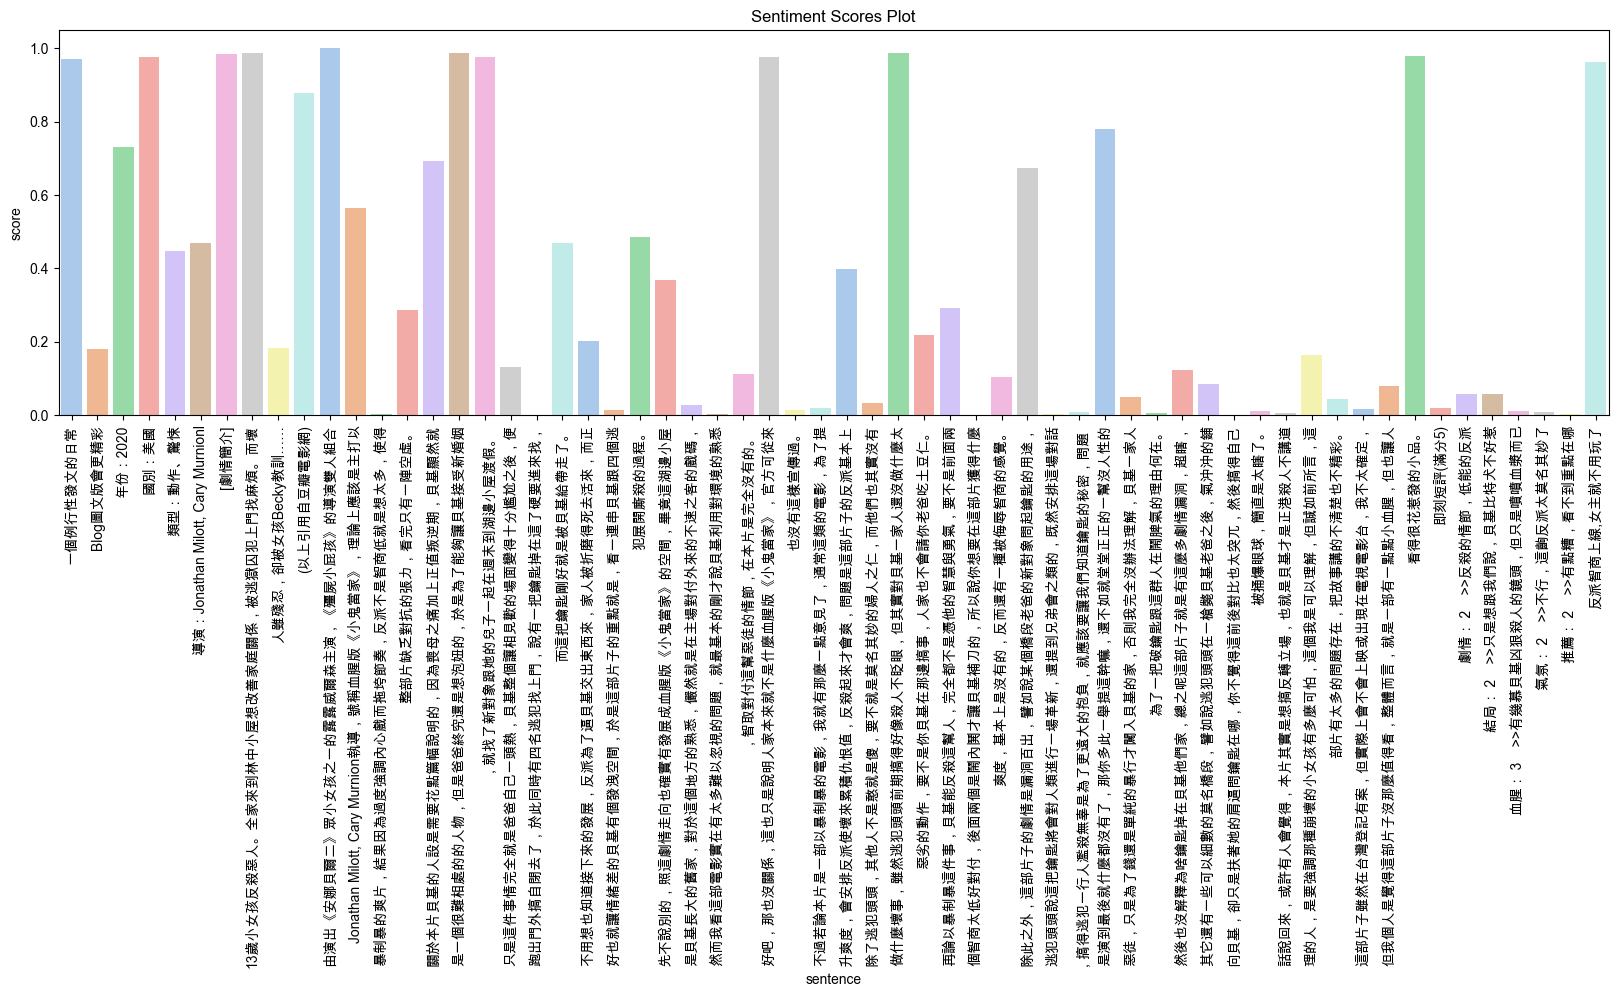

In [22]:
make_plot(df)

In [27]:
!git clone https://github.com/seantyh/dwsd-beta

zsh:1: command not found: git


In [24]:
import sys
if "dwsd-beta" not in sys.path:
  sys.path.append("dwsd-beta")
from dotted_wsd import DottedWsdTagger

ModuleNotFoundError: No module named 'dotted_wsd'